In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [3]:
resnet = models.resnet101(pretrained=True)

In [5]:
from torchvision import transforms

In [7]:
preprocess = transforms.Compose([
    transforms.Resize(256) , # resize to 256 x 256
    transforms.CenterCrop(224) , # crop the image to 224 x 224 outwards to from the center, i.e. get center, go 112 pixels, left, right, up, down
    transforms.ToTensor() , # convert to pytorch tensor
    transforms.Normalize(mean = [0.485, 0.456, 0.406], # normalize the colors: R , G , B so that they are centered at
                         std = [0.229, 0.224, 0.225]) # with a spread per color channel
])

In [8]:
from PIL import Image

In [9]:
img = Image.open('/home/kamil/_LEARNING/dlwpt-code/data/p1ch2/bobby.jpg')

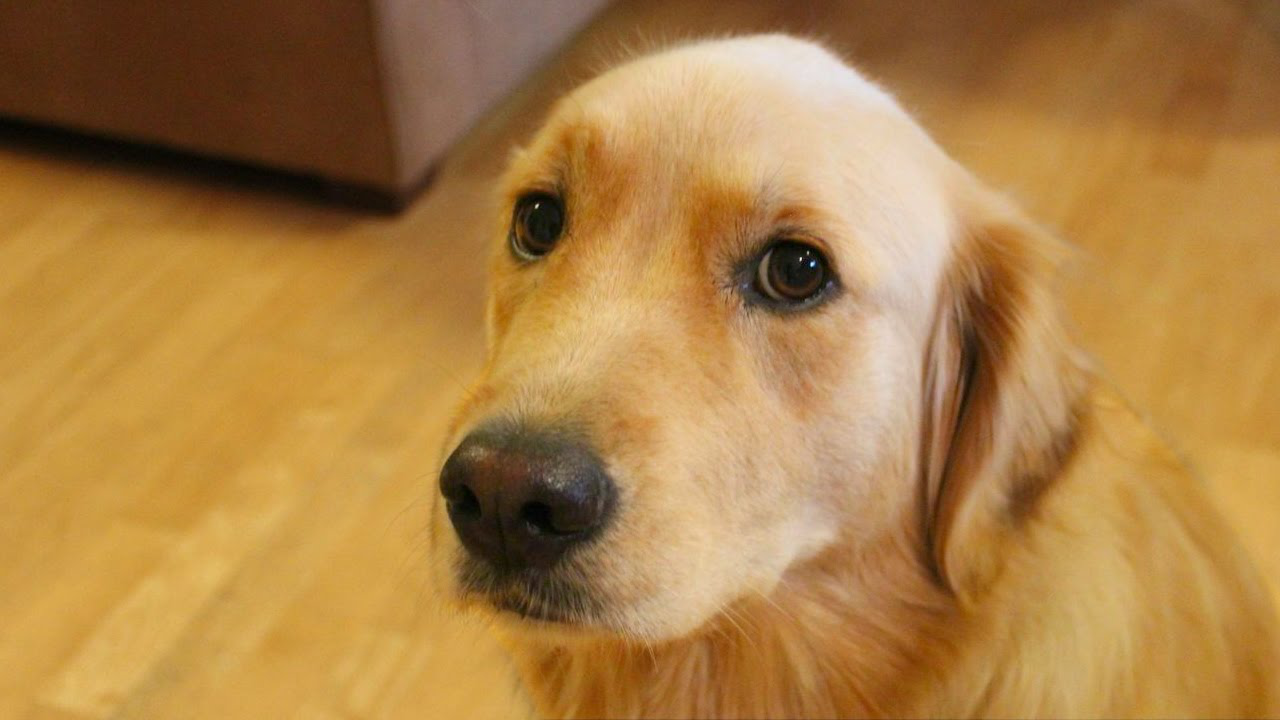

In [10]:
img

In [11]:
img_t = preprocess(img)

In [14]:
img_t.shape

torch.Size([3, 224, 224])

In [12]:
import torch

In [13]:
torch.unsqueeze?

Docstring:
unsqueeze(input, dim) -> Tensor

Returns a new tensor with a dimension of size one inserted at the
specified position.

The returned tensor shares the same underlying data with this tensor.

A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
applied at :attr:`dim` = ``dim + input.dim() + 1``.

Args:
    input (Tensor): the input tensor.
    dim (int): the index at which to insert the singleton dimension

Example::

    >>> x = torch.tensor([1, 2, 3, 4])
    >>> torch.unsqueeze(x, 0)
    tensor([[ 1,  2,  3,  4]])
    >>> torch.unsqueeze(x, 1)
    tensor([[ 1],
            [ 2],
            [ 3],
            [ 4]])
Type:      builtin_function_or_method


In [15]:
batch_t = torch.unsqueeze(img_t, 0)

In [16]:
batch_t.shape

torch.Size([1, 3, 224, 224])

In [17]:
# place the model in inference mode

In [18]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
output = resnet(batch_t)

In [21]:
with open('/home/kamil/_LEARNING/dlwpt-code/data/p1ch2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [22]:
labels[:5]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

In [23]:
# get the max value from the predictions
_, index = torch.max(output, 1)

In [24]:
# can get the confidence as well

In [34]:
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

In [35]:
# why the [0]? --> because the output is a series of nested arrays, in this case it's 
# there is nothing else nested with it, but taking the 0th index will give just the tensor of values
torch.nn.functional.softmax?

Signature: torch.nn.functional.softmax(input, dim=None, _stacklevel=3, dtype=None)
Docstring:
Applies a softmax function.

Softmax is defined as:

:math:`\text{Softmax}(x_{i}) = \frac{exp(x_i)}{\sum_j exp(x_j)}`

It is applied to all slices along dim, and will re-scale them so that the elements
lie in the range `[0, 1]` and sum to 1.

See :class:`~torch.nn.Softmax` for more details.

Arguments:
    input (Tensor): input
    dim (int): A dimension along which softmax will be computed.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
      If specified, the input tensor is casted to :attr:`dtype` before the operation
      is performed. This is useful for preventing data type overflows. Default: None.

.. note::
    This function doesn't work directly with NLLLoss,
    which expects the Log to be computed between the Softmax and itself.
    Use log_softmax instead (it's faster and has better numerical properties).
File:      /opt/miniconda3/envs/k_dlw

In [36]:
torch.nn.functional.softmax(output, dim=1).shape , torch.nn.functional.softmax(output, dim=1)[0].shape

(torch.Size([1, 1000]), torch.Size([1000]))

In [37]:
# get the label and confidence
labels[index[0]] , percentage[index[0]].item()

('golden retriever', 96.29335021972656)

In [38]:
percentage[index[0]]

tensor(96.2934, grad_fn=<SelectBackward>)

In [39]:
# item() is kinda like  .value() in that it returns the stored value as a python type

In [40]:
# lets try our own example

In [41]:
!wget https://sbj.net/uploads/original/20200505-144733-water%20tower.jpg

--2021-05-24 18:32:26--  https://sbj.net/uploads/original/20200505-144733-water%20tower.jpg
Resolving sbj.net (sbj.net)... 65.61.154.7
Connecting to sbj.net (sbj.net)|65.61.154.7|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn1.creativecirclemedia.com/sbj/original/20200505-144733-water%20tower.jpg [following]
--2021-05-24 18:32:26--  https://cdn1.creativecirclemedia.com/sbj/original/20200505-144733-water%20tower.jpg
Resolving cdn1.creativecirclemedia.com (cdn1.creativecirclemedia.com)... 65.61.154.193
Connecting to cdn1.creativecirclemedia.com (cdn1.creativecirclemedia.com)|65.61.154.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348451 (340K) [image/jpeg]
Saving to: ‘20200505-144733-water tower.jpg’

20200505-144733-wat 100%[===================>] 340.28K  --.-KB/s    in 0.02s   

2021-05-24 18:32:26 (14.3 MB/s) - ‘20200505-144733-water tower.jpg’ saved [348451/348451]



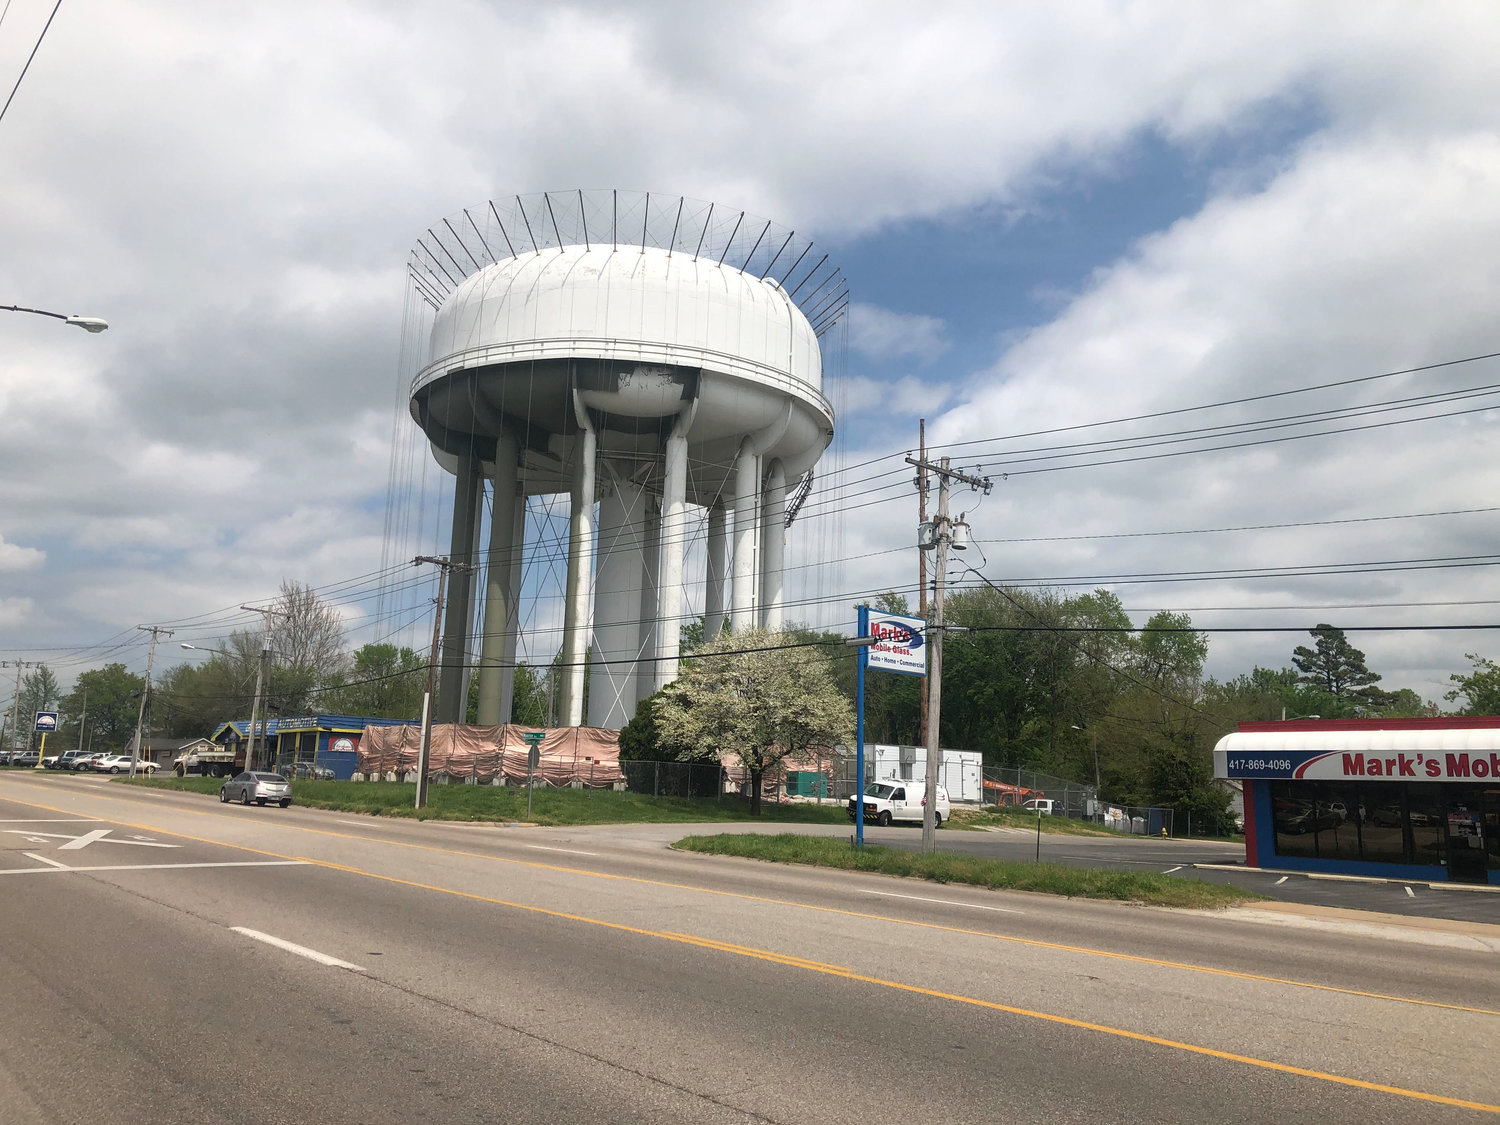

In [42]:
kimg = Image.open('20200505-144733-water tower.jpg')
kimg

In [43]:
# preprocess
km_img_t = preprocess(kimg)

In [44]:
# unsqeeze to bactch
batch_km = torch.unsqueeze(km_img_t, 0)

In [45]:
# eval
kout = resnet(batch_km)

In [46]:
# get the max
_, kind = torch.max(kout, 1)

In [47]:
kperc = torch.nn.functional.softmax(kout, dim=1)[0] * 100

In [48]:
labels[kind[0]], kperc[kind[0]].item()

('water tower', 99.30492401123047)

In [49]:
# audibly impressed